In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
q1 = pd.read_csv("C:\\Users\\ANIL FULE\\1 Python\\Wholesale Customer.csv")
q1

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [6]:
q1['Channel'].unique() #To check how many unique channels are there

array(['Retail', 'Hotel'], dtype=object)

In [7]:
q1['Region'].unique() #To check how many unique regions are there

array(['Other', 'Lisbon', 'Oporto'], dtype=object)

In [8]:
q1.info() #To check if there is any null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [9]:
q1.mean()

Buyer/Spender         220.500000
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [10]:
q1.describe(include = 'all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [11]:
q1['Total'] = q1['Fresh']+q1['Milk']+q1['Grocery']+q1['Frozen']+q1['Detergents_Paper']+q1['Delicatessen']

In [12]:
q1.groupby(['Region']).sum().sort_values(by='Total',ascending=False)    

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Region,,,,,,,,
Other,64026,3960577,1888759,2495251,930492,890410,512110,10677599
Lisbon,18095,854833,422454,570037,231026,204136,104327,2386813
Oporto,14899,464721,239144,433274,190132,173311,54506,1555088


In [13]:
q1.groupby('Channel').sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Channel,,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955,7999569
Retail,25986,1264414,1521743,2317845,234671,1032270,248988,6619931


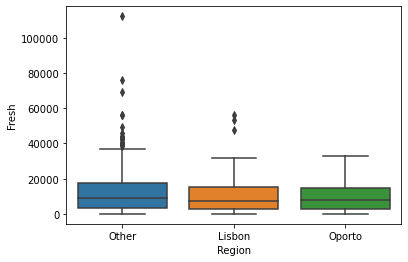

In [14]:
sns.boxplot(x="Region", y="Fresh", data=q1)

In [15]:
rs1 = q1[q1['Channel']=='Retail']
rs1.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,183.000000,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620,46619.232394
std,132.136132,8987.714750,9679.631351,12267.318094,1812.803662,6291.089697,1953.797047,29346.866491
min,1.000000,18.000000,928.000000,2743.000000,33.000000,332.000000,3.000000,14993.000000
25%,61.250000,2347.750000,5938.000000,9245.250000,534.250000,3683.500000,566.750000,30147.250000
50%,166.500000,5993.500000,7812.000000,12390.000000,1081.000000,5614.500000,1350.000000,37139.000000
75%,303.750000,12229.750000,12162.750000,20183.500000,2146.750000,8662.500000,2156.000000,51650.500000
max,438.000000,44466.000000,73498.000000,92780.000000,11559.000000,40827.000000,16523.000000,199891.000000


In [16]:
rs1.skew()

Buyer/Spender       0.281986
Fresh               1.593948
Milk                3.413169
Grocery             2.980945
Frozen              2.526896
Detergents_Paper    2.612425
Delicatessen        3.772841
Total               2.987521
dtype: float64

In [17]:
rs2 = q1[q1['Channel']=='Hotel']
rs2.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,238.369128,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376,26844.191275
std,120.910343,13831.687502,4352.165571,3545.513391,5643.912500,1104.093673,3147.426922,22164.839073
min,4.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,137.250000,4070.250000,1164.500000,1703.750000,830.000000,183.250000,379.000000,13859.250000
50%,241.500000,9581.500000,2157.000000,2684.000000,2057.500000,385.500000,821.000000,21254.500000
75%,344.500000,18274.750000,4029.500000,5076.750000,4558.750000,899.500000,1548.000000,32113.750000
max,440.000000,112151.000000,43950.000000,21042.000000,60869.000000,6907.000000,47943.000000,190169.000000


In [18]:
rs2.skew()

Buyer/Spender       -0.077573
Fresh                2.512084
Milk                 4.660186
Grocery              2.118316
Frozen               5.211448
Detergents_Paper     2.857124
Delicatessen        11.521808
Total                3.543326
dtype: float64

In [19]:
rs3 = q1[q1['Region']=='Other']
rs3.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,202.613924,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266,33789.870253
std,143.615303,13389.213115,7935.463443,9537.287778,4260.126243,4593.051613,3232.581660,27949.337752
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,79.750000,3350.750000,1634.000000,2141.500000,664.750000,251.250000,402.000000,17209.250000
50%,158.500000,8752.500000,3684.500000,4732.000000,1498.000000,856.000000,994.000000,28029.000000
75%,361.250000,17406.500000,7198.750000,10559.750000,3354.750000,3875.750000,1832.750000,42492.250000
max,440.000000,112151.000000,73498.000000,92780.000000,36534.000000,40827.000000,47943.000000,199891.000000


In [66]:
rs3.skew()

Buyer/Spender        0.327663
Fresh                2.617896
Milk                 4.250869
Grocery              3.839176
Frozen               3.963391
Detergents_Paper     3.705302
Delicatessen        10.214896
Total                3.153602
dtype: float64

In [60]:
rs4 = q1[q1['Region']=='Lisbon']
rs4.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,235.000000,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104,30997.571429
std,22.371857,11557.438575,5704.856079,8496.287728,3092.143894,4208.462708,1345.423340,20321.813773
min,197.000000,18.000000,258.000000,489.000000,61.000000,5.000000,7.000000,4925.000000
25%,216.000000,2806.000000,1372.000000,2046.000000,950.000000,284.000000,548.000000,17184.000000
50%,235.000000,7363.000000,3748.000000,3838.000000,1801.000000,737.000000,806.000000,25385.000000
75%,254.000000,15218.000000,7503.000000,9490.000000,4324.000000,3593.000000,1775.000000,38699.000000
max,273.000000,56083.000000,28326.000000,39694.000000,18711.000000,19410.000000,6854.000000,107155.000000


In [67]:
rs4.skew()

Buyer/Spender       0.000000
Fresh               2.013077
Milk                1.923527
Grocery             2.023387
Frozen              2.334571
Detergents_Paper    2.359030
Delicatessen        2.050233
Total               1.459831
dtype: float64

In [61]:
rs5 = q1[q1['Region']=='Oporto']
rs5.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,317.000000,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128,33086.978723
std,13.711309,8387.899211,5826.343145,10842.745314,9151.784954,6514.717668,1050.739841,24234.507325
min,294.000000,3.000000,333.000000,1330.000000,131.000000,15.000000,51.000000,4129.000000
25%,305.500000,2751.500000,1430.500000,2792.500000,811.500000,282.500000,540.500000,20611.500000
50%,317.000000,8090.000000,2374.000000,6114.000000,1455.000000,811.000000,898.000000,26953.000000
75%,328.500000,14925.500000,5772.500000,11758.500000,3272.000000,4324.500000,1538.500000,36158.500000
max,340.000000,32717.000000,25071.000000,67298.000000,60869.000000,38102.000000,5609.000000,130877.000000


In [68]:
rs5.skew()

Buyer/Spender       0.000000
Fresh               0.979873
Milk                1.803677
Grocery             3.637678
Frozen              5.492402
Detergents_Paper    3.620133
Delicatessen        2.152210
Total               2.514050
dtype: float64

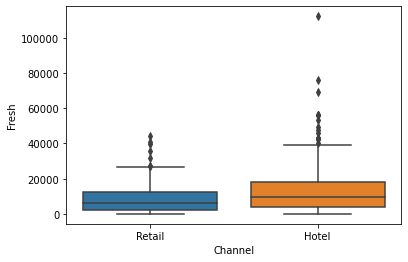

In [62]:
sns.boxplot(x="Channel", y="Fresh", data=q1)

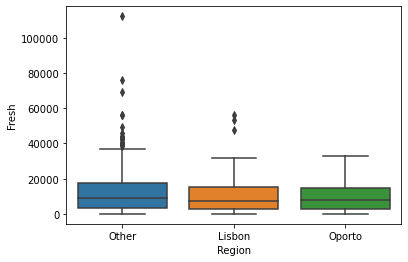

In [16]:
sns.boxplot(x="Region", y="Fresh", data=q1)

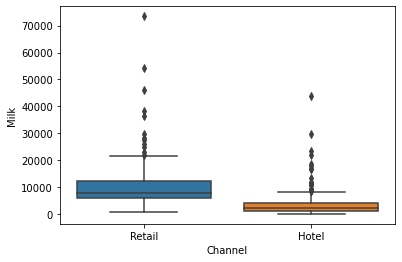

In [17]:
sns.boxplot(x="Channel", y="Milk", data=q1)

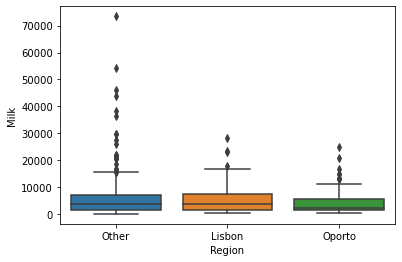

In [18]:
sns.boxplot(x="Region", y="Milk", data=q1)

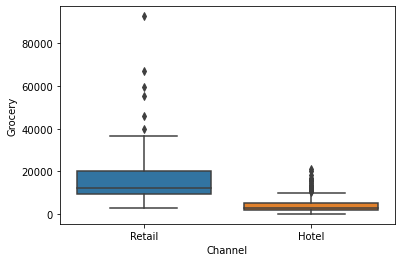

In [19]:
sns.boxplot(x="Channel", y="Grocery", data=q1)

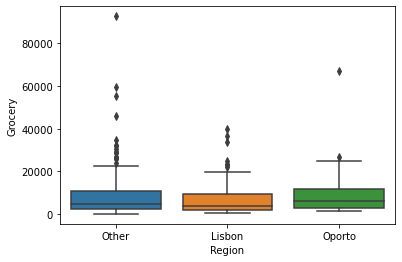

In [20]:
sns.boxplot(x="Region", y="Grocery", data=q1)

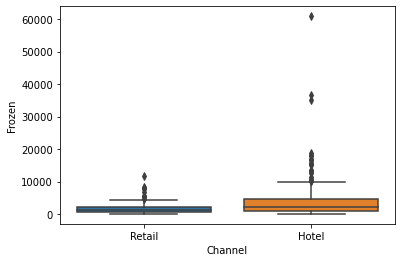

In [21]:
sns.boxplot(x="Channel", y="Frozen", data=q1)

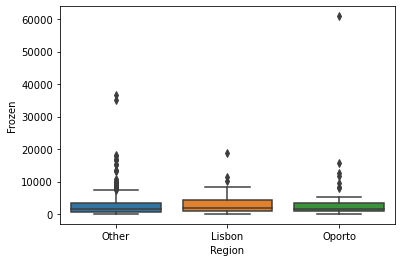

In [22]:
sns.boxplot(x="Region", y="Frozen", data=q1)

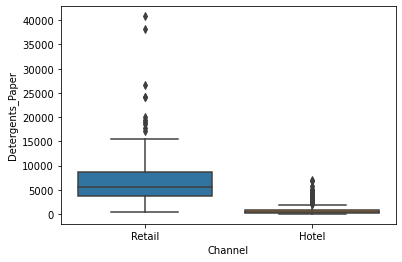

In [23]:
sns.boxplot(x="Channel", y="Detergents_Paper", data=q1)

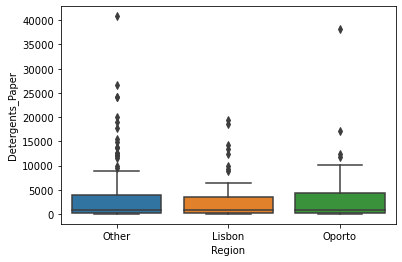

In [24]:
sns.boxplot(x="Region", y="Detergents_Paper", data=q1)

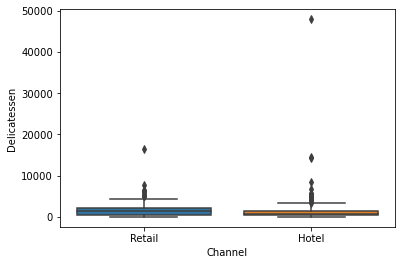

In [25]:
sns.boxplot(x="Channel", y="Delicatessen", data=q1)

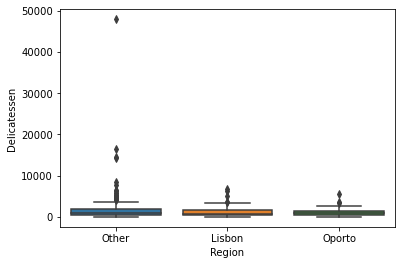

In [26]:
sns.boxplot(x="Region", y="Delicatessen", data=q1)

In [69]:
q1.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


In [77]:
#Fresh
std = 12647.328865
mean = 12000.297727
COV_Fresh = std/mean 
COV_Fresh 

1.0539179237648593

In [78]:
#Milk
std = 7380.377175
mean = 5796.265909
COV_Milk = std/mean 
COV_Milk

1.2732985841005522

In [79]:
#Grocery
std = 9503.162829
mean = 7951.277273
COV_Grocery = std/mean 
COV_Grocery

1.1951743729613995

In [80]:
#Frozen
std = 4854.673333
mean = 3071.931818
COV_Frozen = std/mean 
COV_Frozen

1.5803323838615222

In [81]:
#Detergents_Paper
std = 4767.854448
mean = 2881.493182
COV_Detergents_Paper = std/mean 
COV_Detergents_Paper

1.6546471384293562

In [82]:

#Delicatessen
std = 2820.105937
mean = 1524.870455
COV_Delicatessen = std/mean 
COV_Delicatessen

1.849406897322304

Problem-2 The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set)

In [142]:
q2 = pd.read_csv('Survey-1.csv')
q2

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [143]:
q2['Age'].sum()

1310

In [144]:
q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [145]:
q2['Age'].value_counts()

21    22
20    14
22    11
23     5
19     5
24     3
26     1
18     1
Name: Age, dtype: int64

In [146]:
q2_crosstab1 = pd.crosstab(q2['Gender'],q2['Major'], margins = False)
q2_crosstab1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [147]:
q2_crosstab2 = pd.crosstab(q2['Gender'],q2['Grad Intention'], margins = False)
q2_crosstab2

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [148]:
q2_crosstab3 = pd.crosstab(q2['Gender'],q2['Employment'], margins = False)
q2_crosstab3

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [149]:
q2_crosstab4 = pd.crosstab(q2['Gender'],q2['Computer'], margins = False)
q2_crosstab4

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [150]:
q2.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [151]:
q2['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [163]:
total = 62
male = 29
female = 33
prob_male = male/total
print(prob_male)

0.46774193548387094


In [153]:
prob_female = 1 - prob_male
print(prob_female)

0.532258064516129


In [154]:
q2['Major'].value_counts()

Retailing/Marketing       14
Economics/Finance         11
Management                10
Accounting                 7
Other                      7
International Business     6
CIS                        4
Undecided                  3
Name: Major, dtype: int64

In [166]:
males = q2[q2['Gender']== 'Male']

In [156]:
males.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,26.724138,21.172414,3.082759,48.275862,1.620690,4.000000,516.034483,256.206897
std,15.322478,1.536902,0.355637,10.793174,0.941647,1.195229,239.245015,219.067240
min,2.000000,18.000000,2.500000,25.000000,0.000000,1.000000,200.000000,40.000000
25%,15.000000,20.000000,2.800000,40.000000,1.000000,4.000000,400.000000,100.000000
50%,27.000000,21.000000,3.100000,47.000000,1.000000,4.000000,500.000000,200.000000
75%,37.000000,22.000000,3.400000,55.000000,2.000000,5.000000,600.000000,300.000000
max,55.000000,24.000000,3.600000,80.000000,4.000000,6.000000,1400.000000,800.000000


In [157]:
males['Major'].value_counts()

Management                6
Retailing/Marketing       5
Accounting                4
Other                     4
Economics/Finance         4
Undecided                 3
International Business    2
CIS                       1
Name: Major, dtype: int64

In [158]:
print('Management')
print(6/male)
print('Retailing/Marketing')
print(5/male)
print('Accounting')
print(4/male)
print('Other')
print(4/male)
print('Economics/Finance')
print(4/male)
print('Undecided')
print(3/male)
print('International Business')
print(2/male)
print('CIS')
print(1/male)

Management
0.20689655172413793
Retailing/Marketing
0.1724137931034483
Accounting
0.13793103448275862
Other
0.13793103448275862
Economics/Finance
0.13793103448275862
Undecided
0.10344827586206896
International Business
0.06896551724137931
CIS
0.034482758620689655


In [165]:
females = q2[q2['Gender']== 'Female']

In [160]:
females['Major'].value_counts()

Retailing/Marketing       9
Economics/Finance         7
Management                4
International Business    4
Accounting                3
Other                     3
CIS                       3
Name: Major, dtype: int64

In [164]:
print('Retailing/Marketing')
print(9/female)
print('Economics/Finance')
print(4/female)
print('Management')
print(4/female)
print('International Business')
print(4/female)
print('Accounting')
print(3/female)
print('Other')
print(3/female)
print('CIS')
print(3/female)

Retailing/Marketing
0.2727272727272727
Economics/Finance
0.12121212121212122
Management
0.12121212121212122
International Business
0.12121212121212122
Accounting
0.09090909090909091
Other
0.09090909090909091
CIS
0.09090909090909091


In [167]:
males['Grad Intention'].value_counts()

Yes          17
Undecided     9
No            3
Name: Grad Intention, dtype: int64

In [177]:
print('The probability That a randomly chosen student is a male and intends to graduate')
tot = 62
17/tot

The probability That a randomly chosen student is a male and intends to graduate


0.27419354838709675

In [174]:
females['Computer'].value_counts()

Laptop     29
Desktop     2
Tablet      2
Name: Computer, dtype: int64

In [179]:
nl = 2+2
print('The probability that a randomly selected student is a female and does NOT have a laptop')
print(nl/tot)

The probability that a randomly selected student is a female and does NOT have a laptop
0.06451612903225806


In [181]:
q2['Employment'].value_counts()

Part-Time     43
Full-Time     10
Unemployed     9
Name: Employment, dtype: int64

In [182]:
males['Employment'].value_counts()

Part-Time     19
Full-Time      7
Unemployed     3
Name: Employment, dtype: int64

In [187]:
print('The probability that a randomly chosen student is either a male or has full-time employment')
n = male+10-7
print(n/tot)

The probability that a randomly chosen student is either a male or has full-time employment
0.5161290322580645


In [189]:
females['Major'].value_counts()

Retailing/Marketing       9
Economics/Finance         7
Management                4
International Business    4
Accounting                3
Other                     3
CIS                       3
Name: Major, dtype: int64

In [194]:
print('female_manegement = 4')
print('female_internationalbusiness = 4')
female_manegement = 4
female_internationalbusiness = 4
tf = female_manegement + female_internationalbusiness
cprob = tf/female
print('The conditional probability that given a female student is randomly chosen, she is majoring in international business or management')
print(cprob)

female_manegement = 4
female_internationalbusiness = 4
The conditional probability that given a female student is randomly chosen, she is majoring in international business or management
0.24242424242424243


In [195]:
q2['Grad Intention'].value_counts()

Yes          28
Undecided    22
No           12
Name: Grad Intention, dtype: int64

In [209]:
q2_crosstab5 = pd.crosstab(q2['Gender'],q2['Grad Intention'], margins = False)
q2_crosstab5

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [220]:
req = q2.loc[q2['Grad Intention']!='Undecided']['Grad Intention']
pd.crosstab(index = q2['Gender'],columns = req)

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [247]:
w = q2[q2['GPA'] < 3]


In [239]:
w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 59
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 17 non-null     int64  
 1   Gender             17 non-null     object 
 2   Age                17 non-null     int64  
 3   Class              17 non-null     object 
 4   Major              17 non-null     object 
 5   Grad Intention     17 non-null     object 
 6   GPA                17 non-null     float64
 7   Employment         17 non-null     object 
 8   Salary             17 non-null     float64
 9   Social Networking  17 non-null     int64  
 10  Satisfaction       17 non-null     int64  
 11  Spending           17 non-null     int64  
 12  Computer           17 non-null     object 
 13  Text Messages      17 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 2.0+ KB


In [245]:
print('Number of students less than 3 GPA=')
tgp = 17
print(tgp)
print('Randomly chosen student having probability of GPA less than 3=')
print(tgp/tot)

Number of students less than 3 GPA=
17
Randomly chosen student having probability of GPA less than 3=
0.27419354838709675


In [254]:
s = males[males['Salary'] >= 50]

In [255]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 14 to 54
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 14 non-null     int64  
 1   Gender             14 non-null     object 
 2   Age                14 non-null     int64  
 3   Class              14 non-null     object 
 4   Major              14 non-null     object 
 5   Grad Intention     14 non-null     object 
 6   GPA                14 non-null     float64
 7   Employment         14 non-null     object 
 8   Salary             14 non-null     float64
 9   Social Networking  14 non-null     int64  
 10  Satisfaction       14 non-null     int64  
 11  Spending           14 non-null     int64  
 12  Computer           14 non-null     object 
 13  Text Messages      14 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ KB


In [263]:
print('Males earning 50 and more= 14')
print('The conditional probability that a randomly selected male earns 50 or more')
14/male

Males earning 50 and more= 14
The conditional probability that a randomly selected male earns 50 or more


0.4827586206896552

In [262]:
k = females[females['Salary'] >= 50]
k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 18 non-null     int64  
 1   Gender             18 non-null     object 
 2   Age                18 non-null     int64  
 3   Class              18 non-null     object 
 4   Major              18 non-null     object 
 5   Grad Intention     18 non-null     object 
 6   GPA                18 non-null     float64
 7   Employment         18 non-null     object 
 8   Salary             18 non-null     float64
 9   Social Networking  18 non-null     int64  
 10  Satisfaction       18 non-null     int64  
 11  Spending           18 non-null     int64  
 12  Computer           18 non-null     object 
 13  Text Messages      18 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 2.1+ KB


In [264]:
print('Females earning 50 and more= 18')
print('The conditional probability that a randomly selected female earns 50 or more')
18/female

Females earning 50 and more= 18
The conditional probability that a randomly selected female earns 50 or more


0.5454545454545454

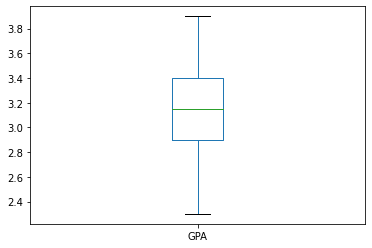

In [270]:
gp = q2['GPA']
gp.plot(kind = 'box')

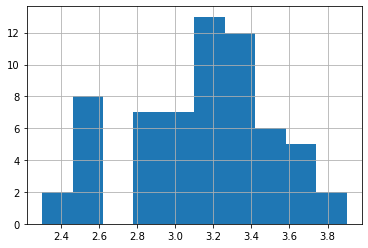

In [271]:
gp.hist()

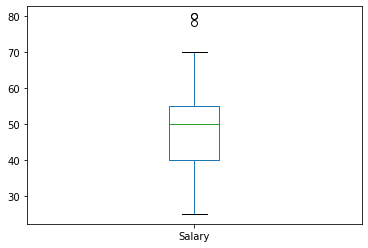

In [272]:
salary = q2['Salary']
salary.plot(kind = 'box')

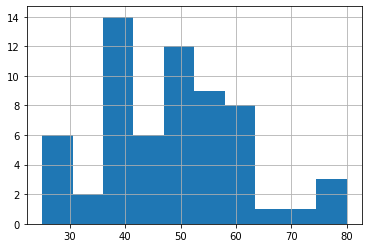

In [273]:
salary.hist()

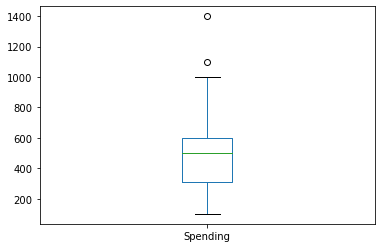

In [276]:
spending = q2['Spending']
spending.plot(kind = 'box')

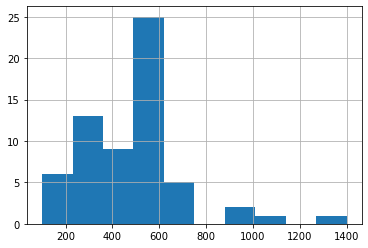

In [277]:
spending.hist()

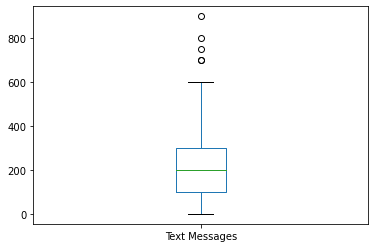

In [278]:
txt = q2['Text Messages']
txt.plot(kind = 'box')

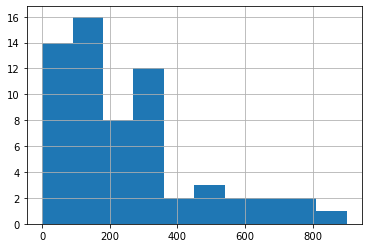

In [279]:
txt.hist()

In [23]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
import pandas as pd
import seaborn as sns
import os

In [24]:
q3 = pd.read_csv('A & B shingles-1.csv')
q3

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [25]:
q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [26]:
q3.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [27]:
q3['A'].mean()

0.3166666666666666

In [28]:
q3['B'].mean()

0.2735483870967742

In [35]:
t_statistic, p_value = ttest_1samp(q3.A, 0.35)

print('One Sample T Test T Statistic: {0} p value: {1} '.format(t_statistic, p_value/2)) 

One Sample T Test T Statistic: -1.4735046253382782 p value: 0.07477633144907513 


In [36]:
t_statistic, p_value = ttest_1samp(q3.B, 0.35,nan_policy='omit' )

print('One Sample T Test T Statistic: {0} p value: {1} '.format(t_statistic, p_value/2)) 

One Sample T Test T Statistic: -3.1003313069986995 p value: 0.0020904774003191826 


In [37]:
t_statistic,p_value=ttest_ind(q3['A'],q3['B'],equal_var=True ,nan_policy='omit')  

print("t_statistic={} and pvalue={}".format(round(t_statistic,3),round(p_value,3))) 

t_statistic=1.29 and pvalue=0.202
